# xgboost test1 简单的蘑菇品种二分类

In [2]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import time

/home/jiang/.conda/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data_path = './data/'
train_data = xgb.DMatrix(data_path + 'agaricus.txt.train')
test_data = xgb.DMatrix(data_path + 'agaricus.txt.test')

In [4]:
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic'}
epochs = 3

In [22]:
start_time = time.clock()
bst = xgb.train(param, train_data, epochs)
end_time = time.clock()
print "执行时间为：" + str(end_time - start_time) + "s"

执行时间为：0.433589s


In [29]:
train_pred = bst.predict(train_data)
train_pred = [round(value) for value in train_pred]
train_label = train_data.get_label()
acc = accuracy_score(train_pred, train_label)
print ("准确度为：{:.2f}%".format(acc * 100))

准确度为：97.77%


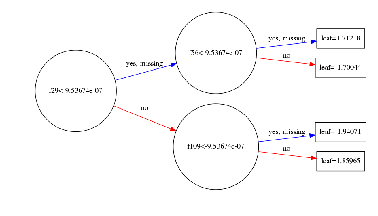

In [26]:
from matplotlib import pyplot 
import graphviz
xgb.plot_tree(bst, num_trees=0, rankdir='LR')
pyplot.show()

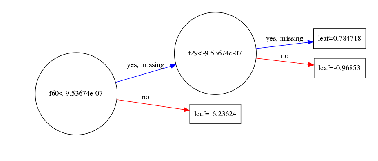

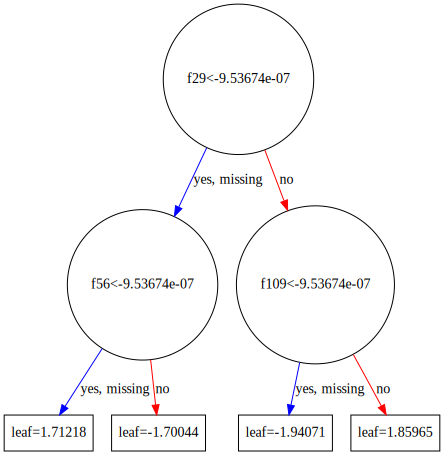

In [30]:
xgb.plot_tree(bst, num_trees=1, rankdir='LR')
pyplot.show()
xgb.to_graphviz(bst, num_trees=0)
# xgb.to_graphviz(bst, num_trees=1)

# xgboost test2 和 sklearn 一起使用

In [8]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt

In [6]:
X_train, y_train = load_svmlight_file(data_path + 'agaricus.txt.train')
X_test, y_test = load_svmlight_file(data_path + 'agaricus.txt.test')

In [37]:
epochs = 2
lr = 1
max_depth = 2
objective = 'binary:logistic'

In [38]:
bst = XGBClassifier(max_depth=max_depth, learning_rate=lr, n_estimators=epochs, 
                    silent = True, objective = objective)
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=2, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [41]:
train_pred = bst.predict(X_test)
train_pred = [round(value) for value in train_pred]
acc = accuracy_score(train_pred, y_test)
print "准确率为：{:.3f}%".format(acc * 100)

准确率为：97.827%


# xgboost test3 交叉验证(sklearn.grid_search.GridSearchCV)

In [7]:
# 运行 xgboost安装包中的示例程序
from xgboost import XGBClassifier

# 加载LibSVM格式数据模块
from sklearn.datasets import load_svmlight_file

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot

/home/jiang/.conda/envs/py2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 构造模型

In [9]:
max_depth_gridsearch = range(1, 5)
lr = [0.01, 0.1, 1]

bst =XGBClassifier(max_depth=max_depth_gridsearch, 
                   learning_rate=lr, 
                   silent=True, 
                   objective='binary:logistic')

### 网格搜索与交叉验证

In [10]:
param_list = {
    'n_estimators':range(1, 5, 1),
    'max_depth':max_depth_gridsearch, 
    'learning_rate':lr
}
    
clf = GridSearchCV(estimator=bst, param_grid=param_list, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=[0.01, 0.1, 1], max_delta_step=0,
       max_depth=[1, 2, 3, 4], min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='binary:logistic',
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [14]:
clf.grid_scores_, clf.get_params, clf.best_score_

([mean: 0.88607, std: 0.14971, params: {'n_estimators': 1, 'learning_rate': 0.01, 'max_depth': 1},
  mean: 0.88607, std: 0.14971, params: {'n_estimators': 2, 'learning_rate': 0.01, 'max_depth': 1},
  mean: 0.88607, std: 0.14971, params: {'n_estimators': 3, 'learning_rate': 0.01, 'max_depth': 1},
  mean: 0.88607, std: 0.14971, params: {'n_estimators': 4, 'learning_rate': 0.01, 'max_depth': 1},
  mean: 0.90542, std: 0.08996, params: {'n_estimators': 1, 'learning_rate': 0.01, 'max_depth': 2},
  mean: 0.90542, std: 0.08996, params: {'n_estimators': 2, 'learning_rate': 0.01, 'max_depth': 2},
  mean: 0.90542, std: 0.08996, params: {'n_estimators': 3, 'learning_rate': 0.01, 'max_depth': 2},
  mean: 0.90542, std: 0.08996, params: {'n_estimators': 4, 'learning_rate': 0.01, 'max_depth': 2},
  mean: 0.89053, std: 0.14598, params: {'n_estimators': 1, 'learning_rate': 0.01, 'max_depth': 3},
  mean: 0.89053, std: 0.14598, params: {'n_estimators': 2, 'learning_rate': 0.01, 'max_depth': 3},
  mean: 0.

# xgboost test4 earlystoping

In [20]:
# split data into train and test sets, 1/3的训练数据作为校验数据
seed = 7
test_size = 0.33
X_train_part, X_validate, y_train_part, y_validate= train_test_split(X_train, y_train, test_size=test_size,
    random_state=seed)

X_train_part.shape
X_validate.shape

(2150, 126)

### 参数设置

In [21]:
# 设置boosting迭代计算次数
num_round = 100

#bst = XGBClassifier(param)
#bst = XGBClassifier()
bst =XGBClassifier(max_depth=2, learning_rate=1, n_estimators=num_round, silent=True, objective='binary:logistic')

#eval_set = [(X_train_part, y_train_part), (X_validation, y_validation)]
#bst.fit(X_train_part, y_train_part, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

eval_set = [(X_train_part, y_train_part), (X_validate, y_validate)]
bst.fit(X_train_part, y_train_part, early_stopping_rounds=10, eval_metric=["error", "logloss"],
    eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.045611	validation_0-logloss:0.231512	validation_1-error:0.048372	validation_1-logloss:0.237263
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.021545	validation_0-logloss:0.135258	validation_1-error:0.023721	validation_1-logloss:0.13948
[2]	validation_0-error:0.007105	validation_0-logloss:0.082762	validation_1-error:0.006977	validation_1-logloss:0.082865
[3]	validation_0-error:0.015815	validation_0-logloss:0.057677	validation_1-error:0.013953	validation_1-logloss:0.055721
[4]	validation_0-error:0.007105	validation_0-logloss:0.041543	validation_1-error:0.006977	validation_1-logloss:0.043145
[5]	validation_0-error:0.001146	validation_0-logloss:0.029968	validation_1-error:0.001395	validation_1-logloss:0.031232
[6]	validation_0-error:0.001146	validation_0-logloss:0.019453	validation_1-error:0.001395	validation_1-logloss:0.020

[74]	validation_0-error:0	validation_0-logloss:0.000701	validation_1-error:0	validation_1-logloss:0.000707
[75]	validation_0-error:0	validation_0-logloss:0.000701	validation_1-error:0	validation_1-logloss:0.000707
[76]	validation_0-error:0	validation_0-logloss:0.0007	validation_1-error:0	validation_1-logloss:0.000705
[77]	validation_0-error:0	validation_0-logloss:0.000699	validation_1-error:0	validation_1-logloss:0.000702
[78]	validation_0-error:0	validation_0-logloss:0.000698	validation_1-error:0	validation_1-logloss:0.000701
[79]	validation_0-error:0	validation_0-logloss:0.000697	validation_1-error:0	validation_1-logloss:0.000701
[80]	validation_0-error:0	validation_0-logloss:0.000696	validation_1-error:0	validation_1-logloss:0.000699
[81]	validation_0-error:0	validation_0-logloss:0.000695	validation_1-error:0	validation_1-logloss:0.000699
[82]	validation_0-error:0	validation_0-logloss:0.000695	validation_1-error:0	validation_1-logloss:0.000695
[83]	validation_0-error:0	validation_0-

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

### 显示学习曲线

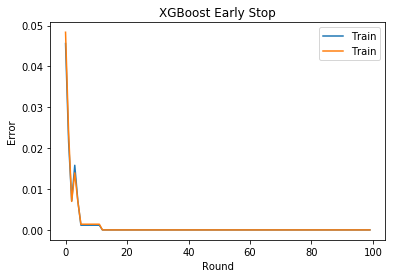

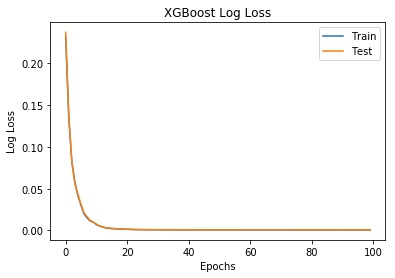

In [25]:
# retrieve performance metrics
results = bst.evals_result()
#print(results)

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# 画出分类器 error 曲线
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Train')
ax.legend()
pyplot.ylabel('Error')
pyplot.xlabel('Round')
pyplot.title('XGBoost Early Stop')
pyplot.show()

# 画出分类器 loss 曲线
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label = 'Train')
ax.plot(x_axis, results['validation_1']['logloss'], label = 'Test')
ax.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()